<a href="https://colab.research.google.com/github/moshanATucsd/simple_word_cloud_from_pdfs/blob/master/word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

references: [ref1](https://github.com/jackzhenguo/python-small-examples), [ref2](https://www.cnblogs.com/lsdb/p/9199037.html)

In [0]:
!pip install pdfminer3k

In [0]:
from urllib.request import urlopen
from pdfminer.pdfinterp import process_pdf, PDFResourceManager
from io import StringIO
from pdfminer.layout import LAParams
from pdfminer.converter import TextConverter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [0]:
class MyWordCloud():
  def __init__(self):
    pass 

  def getPdfText(self, pdf_url):
    pdf_file_obj = urlopen(pdf_url)
    pdf_rm = PDFResourceManager()
    ret_str = StringIO()
    lap = LAParams()
    tc = TextConverter(pdf_rm, ret_str, laparams=lap)

    process_pdf(pdf_rm, tc, pdf_file_obj)
    tc.close()
    pdf_text = ret_str.getvalue()
    ret_str.close()

    return pdf_text

  def genWordCloud(self, pdf_url_list):
    pdf_text = ''

    for pdf_url in pdf_url_list:
      pdf_text += self.getPdfText(pdf_url)

    wc = WordCloud(
        background_color="white", 
        max_words=10, 
        min_font_size=50,
        max_font_size=200,
        width=1000  
        ).generate(pdf_text)

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

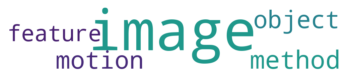

In [0]:
if __name__ == '__main__':
  pdf_url_list = []

  pdf_url = 'https://arxiv.org/pdf/1703.10125.pdf'
  pdf_url_list.append(pdf_url)

  pdf_url = 'https://arxiv.org/pdf/1707.02069.pdf'
  pdf_url_list.append(pdf_url)

  pdf_url = 'https://moshanatucsd.github.io/pdfs/paper/scr2019.pdf'
  pdf_url_list.append(pdf_url)

  pdf_url = 'https://moshanatucsd.github.io/pdfs/presentation/vio_project.pdf'
  pdf_url_list.append(pdf_url)

  pdf_url = 'https://www.ece.nus.edu.sg/stfpage/eleclf/Block-sparse%20RPCA%20for%20Consistent%20Foregroud%20Detection.pdf'
  pdf_url_list.append(pdf_url)

  mwc = MyWordCloud()
  mwc.genWordCloud(pdf_url_list)